In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



Demonstration: How Voting Corrects Errors

Task: Solve step with correct answer = 42
Each agent has 30% error rate

Individual Agent Answers:
  Agent 1: 42 ✓ Correct
  Agent 2: 42 ✓ Correct
  Agent 3: 41 ✗ Wrong
  Agent 4: 42 ✓ Correct
  Agent 5: 43 ✗ Wrong

Voting Result: 42
Status: ✓ CORRECT

Multi-Agent Voting System for Long Reasoning Tasks

Task: 200 reasoning steps
Individual agent error rate: 15%
Number of trials: 10

Results:
  Single Agent Accuracy: 84.80%
  Multi-Agent Voting Accuracy: 99.45%
  Improvement: 14.65%

Graph saved as 'multi_agent_voting_results.png'


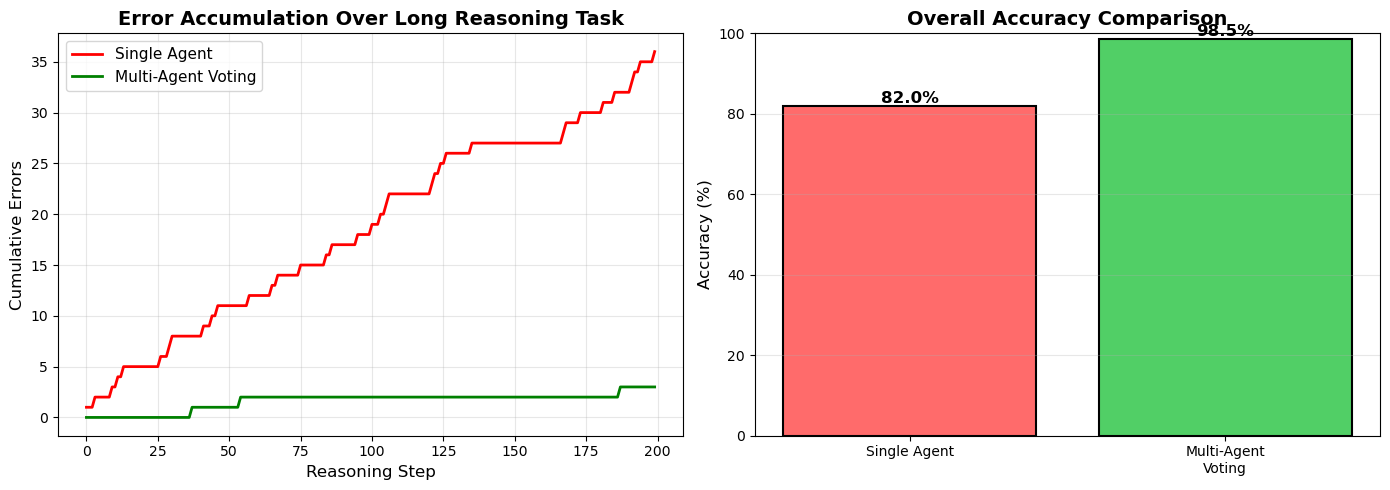


Tower of Hanoi: Real Reasoning Task Example

Problem: Tower of Hanoi with 4 disks
Total steps required: 15
Goal: Move all disks from peg A to peg C

Running trials...

Results:
  Single Agent Accuracy: 87.00%
  Multi-Agent Voting Accuracy: 99.67%
  Improvement: 12.67%

Detailed Example (First 10 moves):
------------------------------------------------------------
  Step 1: Move disk from A to B | Predicted: A to B ✓
  Step 2: Move disk from A to C | Predicted: A to C ✓
  Step 3: Move disk from B to C | Predicted: B to C ✓
  Step 4: Move disk from A to B | Predicted: A to B ✓
  Step 5: Move disk from C to A | Predicted: C to A ✓
  Step 6: Move disk from C to B | Predicted: C to B ✓
  Step 7: Move disk from A to B | Predicted: A to B ✓
  Step 8: Move disk from A to C | Predicted: A to C ✓
  Step 9: Move disk from B to C | Predicted: B to C ✓
  Step 10: Move disk from B to A | Predicted: B to A ✓

Tower of Hanoi graph saved as 'tower_of_hanoi_results.png'


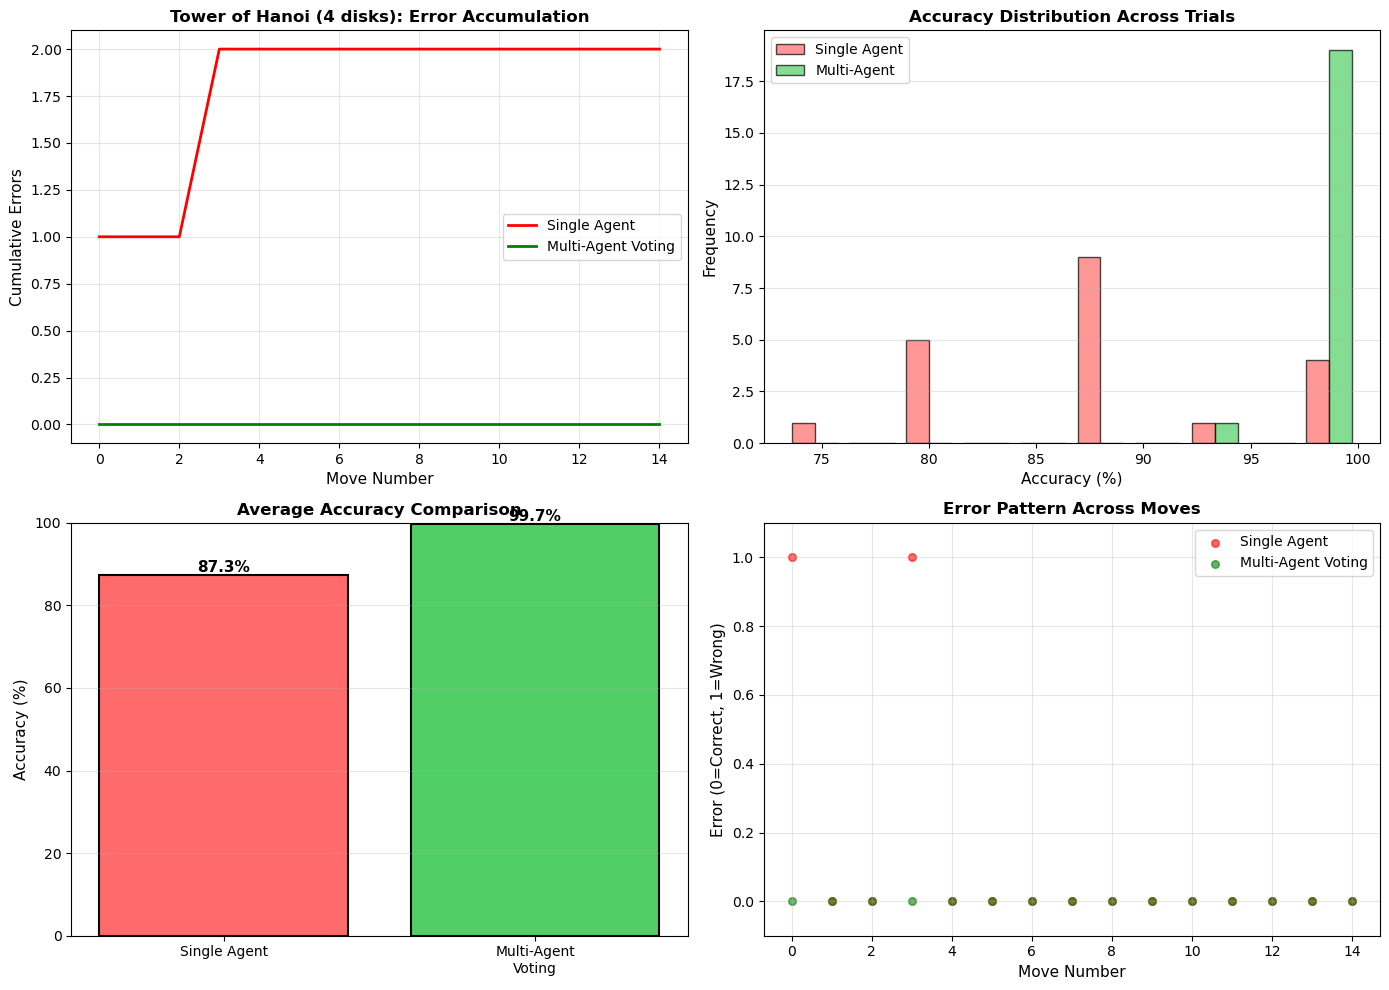


Conclusion:
The multi-agent voting system significantly reduces error
accumulation in long reasoning tasks by correcting mistakes
at each step through collective decision-making.
Demonstrated on both abstract tasks and Tower of Hanoi puzzle.


In [3]:
"""
Multi-Agent Voting System for Long Reasoning Tasks
A simple implementation demonstrating error correction through voting
"""

import random
import matplotlib.pyplot as plt
from collections import Counter

class MicroAgent:
    """A simple micro-agent that solves a single reasoning step"""
    
    def __init__(self, agent_id, error_rate=0.15):
        self.agent_id = agent_id
        self.error_rate = error_rate  # Probability of making an error
    
    def solve_step(self, step_number, correct_answer):
        """
        Simulates solving a single reasoning step
        Returns correct answer with probability (1 - error_rate)
        """
        if random.random() < self.error_rate:
            # Agent makes an error - returns a random wrong answer
            wrong_answers = [correct_answer + i for i in range(-3, 4) if i != 0]
            return random.choice(wrong_answers)
        else:
            # Agent gets it right
            return correct_answer


class MultiAgentSystem:
    """System that uses multiple agents with voting for error correction"""
    
    def __init__(self, num_agents=5, error_rate=0.15):
        self.agents = [MicroAgent(i, error_rate) for i in range(num_agents)]
        self.num_agents = num_agents
    
    def solve_with_voting(self, step_number, correct_answer):
        """
        Multiple agents solve the same step and vote on the answer
        """
        # Collect answers from all agents
        answers = [agent.solve_step(step_number, correct_answer) 
                   for agent in self.agents]
        
        # Voting: select the most common answer
        vote_counts = Counter(answers)
        voted_answer = vote_counts.most_common(1)[0][0]
        
        return voted_answer, answers
    
    def run_long_task(self, num_steps=100):
        """
        Run a long reasoning task with voting-based error correction
        Returns success rate and error tracking
        """
        correct_count = 0
        errors_at_step = []
        
        for step in range(num_steps):
            correct_answer = step  # Simple task: answer should equal step number
            voted_answer, individual_answers = self.solve_with_voting(step, correct_answer)
            
            if voted_answer == correct_answer:
                correct_count += 1
                errors_at_step.append(0)
            else:
                errors_at_step.append(1)
        
        accuracy = (correct_count / num_steps) * 100
        return accuracy, errors_at_step


class SingleAgentSystem:
    """Baseline: single agent without voting"""
    
    def __init__(self, error_rate=0.15):
        self.agent = MicroAgent(0, error_rate)
    
    def run_long_task(self, num_steps=100):
        """Run task with single agent (no error correction)"""
        correct_count = 0
        errors_at_step = []
        
        for step in range(num_steps):
            correct_answer = step
            answer = self.agent.solve_step(step, correct_answer)
            
            if answer == correct_answer:
                correct_count += 1
                errors_at_step.append(0)
            else:
                errors_at_step.append(1)
        
        accuracy = (correct_count / num_steps) * 100
        return accuracy, errors_at_step


def compare_systems(num_steps=200, num_trials=10):
    """
    Compare single agent vs multi-agent voting system
    """
    print("=" * 60)
    print("Multi-Agent Voting System for Long Reasoning Tasks")
    print("=" * 60)
    print()
    
    # Run multiple trials
    single_accuracies = []
    multi_accuracies = []
    
    for trial in range(num_trials):
        # Single agent baseline
        single_system = SingleAgentSystem(error_rate=0.15)
        single_acc, _ = single_system.run_long_task(num_steps)
        single_accuracies.append(single_acc)
        
        # Multi-agent voting system
        multi_system = MultiAgentSystem(num_agents=5, error_rate=0.15)
        multi_acc, _ = multi_system.run_long_task(num_steps)
        multi_accuracies.append(multi_acc)
    
    # Calculate averages
    avg_single = sum(single_accuracies) / len(single_accuracies)
    avg_multi = sum(multi_accuracies) / len(multi_accuracies)
    
    # Print results
    print(f"Task: {num_steps} reasoning steps")
    print(f"Individual agent error rate: 15%")
    print(f"Number of trials: {num_trials}")
    print()
    print("Results:")
    print(f"  Single Agent Accuracy: {avg_single:.2f}%")
    print(f"  Multi-Agent Voting Accuracy: {avg_multi:.2f}%")
    print(f"  Improvement: {avg_multi - avg_single:.2f}%")
    print()
    
    # Visualize one detailed run
    visualize_comparison(num_steps)


def visualize_comparison(num_steps=200):
    """Create visualization comparing both approaches"""
    
    # Run one instance of each
    single_system = SingleAgentSystem(error_rate=0.15)
    single_acc, single_errors = single_system.run_long_task(num_steps)
    
    multi_system = MultiAgentSystem(num_agents=5, error_rate=0.15)
    multi_acc, multi_errors = multi_system.run_long_task(num_steps)
    
    # Calculate cumulative errors
    single_cumulative = [sum(single_errors[:i+1]) for i in range(len(single_errors))]
    multi_cumulative = [sum(multi_errors[:i+1]) for i in range(len(multi_errors))]
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Cumulative errors over steps
    ax1.plot(single_cumulative, label='Single Agent', color='red', linewidth=2)
    ax1.plot(multi_cumulative, label='Multi-Agent Voting', color='green', linewidth=2)
    ax1.set_xlabel('Reasoning Step', fontsize=12)
    ax1.set_ylabel('Cumulative Errors', fontsize=12)
    ax1.set_title('Error Accumulation Over Long Reasoning Task', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Accuracy comparison
    systems = ['Single Agent', 'Multi-Agent\nVoting']
    accuracies = [single_acc, multi_acc]
    colors = ['#ff6b6b', '#51cf66']
    
    bars = ax2.bar(systems, accuracies, color=colors, edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.set_title('Overall Accuracy Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.1f}%',
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('multi_agent_voting_results.png', dpi=300, bbox_inches='tight')
    print("Graph saved as 'multi_agent_voting_results.png'")
    plt.show()


def demonstrate_voting_mechanism():
    """Show how voting works on a single step"""
    print("\n" + "=" * 60)
    print("Demonstration: How Voting Corrects Errors")
    print("=" * 60)
    print()
    
    correct_answer = 42
    system = MultiAgentSystem(num_agents=5, error_rate=0.3)
    
    print(f"Task: Solve step with correct answer = {correct_answer}")
    print(f"Each agent has 30% error rate")
    print()
    
    # Run one step
    voted_answer, individual_answers = system.solve_with_voting(0, correct_answer)
    
    print("Individual Agent Answers:")
    for i, answer in enumerate(individual_answers):
        status = "✓ Correct" if answer == correct_answer else "✗ Wrong"
        print(f"  Agent {i+1}: {answer} {status}")
    
    print()
    print(f"Voting Result: {voted_answer}")
    print(f"Status: {'✓ CORRECT' if voted_answer == correct_answer else '✗ WRONG'}")
    print()


class TowerOfHanoiTask:
    """Tower of Hanoi problem as a real reasoning task"""
    
    def __init__(self, num_disks=3):
        self.num_disks = num_disks
        self.optimal_moves = self.solve_hanoi(num_disks, 'A', 'C', 'B')
        self.total_steps = len(self.optimal_moves)
    
    def solve_hanoi(self, n, source, target, auxiliary):
        """Generate optimal solution for Tower of Hanoi"""
        if n == 1:
            return [(source, target)]
        
        moves = []
        moves.extend(self.solve_hanoi(n-1, source, auxiliary, target))
        moves.append((source, target))
        moves.extend(self.solve_hanoi(n-1, auxiliary, target, source))
        return moves
    
    def verify_state(self, state, step):
        """Verify if the state is correct after given number of steps"""
        # Simulate the game state
        towers = {'A': list(range(self.num_disks, 0, -1)), 'B': [], 'C': []}
        
        for i in range(step + 1):
            if i >= len(self.optimal_moves):
                return False
            from_peg, to_peg = self.optimal_moves[i]
            if towers[from_peg]:
                disk = towers[from_peg].pop()
                towers[to_peg].append(disk)
        
        return towers == state


class HanoiMicroAgent:
    """Agent that solves Tower of Hanoi steps with some error probability"""
    
    def __init__(self, agent_id, error_rate=0.15):
        self.agent_id = agent_id
        self.error_rate = error_rate
    
    def predict_next_move(self, current_step, correct_move):
        """
        Predict the next move in Tower of Hanoi
        correct_move is a tuple like ('A', 'C')
        """
        if random.random() < self.error_rate:
            # Make a random wrong move
            pegs = ['A', 'B', 'C']
            wrong_from = random.choice(pegs)
            wrong_to = random.choice([p for p in pegs if p != wrong_from])
            return (wrong_from, wrong_to)
        else:
            return correct_move


class HanoiMultiAgentSystem:
    """Multi-agent system for Tower of Hanoi"""
    
    def __init__(self, num_agents=5, error_rate=0.15):
        self.agents = [HanoiMicroAgent(i, error_rate) for i in range(num_agents)]
        self.num_agents = num_agents
    
    def solve_with_voting(self, step, correct_move):
        """Multiple agents predict the move and vote"""
        predictions = [agent.predict_next_move(step, correct_move) 
                      for agent in self.agents]
        
        # Vote on the move
        vote_counts = Counter(predictions)
        voted_move = vote_counts.most_common(1)[0][0]
        
        return voted_move, predictions
    
    def solve_hanoi(self, num_disks=3):
        """Solve complete Tower of Hanoi with voting"""
        task = TowerOfHanoiTask(num_disks)
        correct_moves = task.optimal_moves
        
        predicted_moves = []
        errors = []
        
        for step, correct_move in enumerate(correct_moves):
            voted_move, individual_predictions = self.solve_with_voting(step, correct_move)
            predicted_moves.append(voted_move)
            
            if voted_move == correct_move:
                errors.append(0)
            else:
                errors.append(1)
        
        accuracy = (len([e for e in errors if e == 0]) / len(errors)) * 100
        return accuracy, errors, predicted_moves


class HanoiSingleAgent:
    """Single agent solving Tower of Hanoi"""
    
    def __init__(self, error_rate=0.15):
        self.agent = HanoiMicroAgent(0, error_rate)
    
    def solve_hanoi(self, num_disks=3):
        """Solve Tower of Hanoi without voting"""
        task = TowerOfHanoiTask(num_disks)
        correct_moves = task.optimal_moves
        
        predicted_moves = []
        errors = []
        
        for step, correct_move in enumerate(correct_moves):
            predicted_move = self.agent.predict_next_move(step, correct_move)
            predicted_moves.append(predicted_move)
            
            if predicted_move == correct_move:
                errors.append(0)
            else:
                errors.append(1)
        
        accuracy = (len([e for e in errors if e == 0]) / len(errors)) * 100
        return accuracy, errors, predicted_moves


def demonstrate_tower_of_hanoi():
    """Demonstrate the system on Tower of Hanoi problem"""
    print("\n" + "=" * 60)
    print("Tower of Hanoi: Real Reasoning Task Example")
    print("=" * 60)
    print()
    
    num_disks = 4
    task = TowerOfHanoiTask(num_disks)
    
    print(f"Problem: Tower of Hanoi with {num_disks} disks")
    print(f"Total steps required: {task.total_steps}")
    print(f"Goal: Move all disks from peg A to peg C")
    print()
    
    # Run multiple trials
    num_trials = 20
    single_accuracies = []
    multi_accuracies = []
    
    print("Running trials...")
    for trial in range(num_trials):
        single_agent = HanoiSingleAgent(error_rate=0.15)
        single_acc, _, _ = single_agent.solve_hanoi(num_disks)
        single_accuracies.append(single_acc)
        
        multi_agent = HanoiMultiAgentSystem(num_agents=5, error_rate=0.15)
        multi_acc, _, _ = multi_agent.solve_hanoi(num_disks)
        multi_accuracies.append(multi_acc)
    
    avg_single = sum(single_accuracies) / len(single_accuracies)
    avg_multi = sum(multi_accuracies) / len(multi_accuracies)
    
    print()
    print("Results:")
    print(f"  Single Agent Accuracy: {avg_single:.2f}%")
    print(f"  Multi-Agent Voting Accuracy: {avg_multi:.2f}%")
    print(f"  Improvement: {avg_multi - avg_single:.2f}%")
    print()
    
    # Show one detailed example
    print("Detailed Example (First 10 moves):")
    print("-" * 60)
    
    multi_agent = HanoiMultiAgentSystem(num_agents=5, error_rate=0.15)
    _, errors, predicted = multi_agent.solve_hanoi(num_disks)
    
    for i in range(min(10, len(task.optimal_moves))):
        correct = task.optimal_moves[i]
        pred = predicted[i]
        status = "✓" if errors[i] == 0 else "✗"
        print(f"  Step {i+1}: Move disk from {correct[0]} to {correct[1]} | "
              f"Predicted: {pred[0]} to {pred[1]} {status}")
    
    print()
    
    # Visualize Hanoi results
    visualize_hanoi_comparison(num_disks, num_trials)


def visualize_hanoi_comparison(num_disks=4, num_trials=20):
    """Create visualization for Tower of Hanoi results"""
    
    # Collect data from multiple trials
    single_accuracies = []
    multi_accuracies = []
    
    for _ in range(num_trials):
        single_agent = HanoiSingleAgent(error_rate=0.15)
        single_acc, _, _ = single_agent.solve_hanoi(num_disks)
        single_accuracies.append(single_acc)
        
        multi_agent = HanoiMultiAgentSystem(num_agents=5, error_rate=0.15)
        multi_acc, _, _ = multi_agent.solve_hanoi(num_disks)
        multi_accuracies.append(multi_acc)
    
    # One detailed run for error tracking
    single_agent = HanoiSingleAgent(error_rate=0.15)
    single_acc, single_errors, _ = single_agent.solve_hanoi(num_disks)
    
    multi_agent = HanoiMultiAgentSystem(num_agents=5, error_rate=0.15)
    multi_acc, multi_errors, _ = multi_agent.solve_hanoi(num_disks)
    
    # Calculate cumulative errors
    single_cumulative = [sum(single_errors[:i+1]) for i in range(len(single_errors))]
    multi_cumulative = [sum(multi_errors[:i+1]) for i in range(len(multi_errors))]
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Cumulative errors for Hanoi
    ax1 = axes[0, 0]
    ax1.plot(single_cumulative, label='Single Agent', color='red', linewidth=2)
    ax1.plot(multi_cumulative, label='Multi-Agent Voting', color='green', linewidth=2)
    ax1.set_xlabel('Move Number', fontsize=11)
    ax1.set_ylabel('Cumulative Errors', fontsize=11)
    ax1.set_title(f'Tower of Hanoi ({num_disks} disks): Error Accumulation', 
                  fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Accuracy distribution
    ax2 = axes[0, 1]
    ax2.hist([single_accuracies, multi_accuracies], bins=10, 
             label=['Single Agent', 'Multi-Agent'], 
             color=['#ff6b6b', '#51cf66'], alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Accuracy (%)', fontsize=11)
    ax2.set_ylabel('Frequency', fontsize=11)
    ax2.set_title('Accuracy Distribution Across Trials', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: Average comparison
    ax3 = axes[1, 0]
    systems = ['Single Agent', 'Multi-Agent\nVoting']
    avg_accs = [sum(single_accuracies)/len(single_accuracies), 
                sum(multi_accuracies)/len(multi_accuracies)]
    colors = ['#ff6b6b', '#51cf66']
    
    bars = ax3.bar(systems, avg_accs, color=colors, edgecolor='black', linewidth=1.5)
    ax3.set_ylabel('Accuracy (%)', fontsize=11)
    ax3.set_title('Average Accuracy Comparison', fontsize=12, fontweight='bold')
    ax3.set_ylim(0, 100)
    ax3.grid(True, alpha=0.3, axis='y')
    
    for bar, acc in zip(bars, avg_accs):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 4: Error rate per step
    ax4 = axes[1, 1]
    step_range = list(range(len(single_errors)))
    ax4.scatter(step_range, single_errors, alpha=0.6, color='red', 
                label='Single Agent', s=30)
    ax4.scatter(step_range, multi_errors, alpha=0.6, color='green', 
                label='Multi-Agent Voting', s=30)
    ax4.set_xlabel('Move Number', fontsize=11)
    ax4.set_ylabel('Error (0=Correct, 1=Wrong)', fontsize=11)
    ax4.set_title('Error Pattern Across Moves', fontsize=12, fontweight='bold')
    ax4.set_ylim(-0.1, 1.1)
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('tower_of_hanoi_results.png', dpi=300, bbox_inches='tight')
    print("Tower of Hanoi graph saved as 'tower_of_hanoi_results.png'")
    plt.show()


if __name__ == "__main__":
    # Run demonstrations
    demonstrate_voting_mechanism()
    compare_systems(num_steps=200, num_trials=10)
    
    # Tower of Hanoi demonstration
    demonstrate_tower_of_hanoi()
    
    print("\n" + "=" * 60)
    print("Conclusion:")
    print("=" * 60)
    print("The multi-agent voting system significantly reduces error")
    print("accumulation in long reasoning tasks by correcting mistakes")
    print("at each step through collective decision-making.")
    print("Demonstrated on both abstract tasks and Tower of Hanoi puzzle.")
    print("=" * 60)